In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

from lbg_forecast.sps import simulate_sed
from lbg_forecast.sps import initialise_sps_model
from lbg_forecast.sps import update_sps_parameters
from lbg_forecast.sps import update_sps_model
from lbg_forecast.sps import plot_sed
from lbg_forecast.sps import simulate_photometry_lsst_fsps
from lbg_forecast.sps import simulate_photometry_lsst
from lbg_forecast.popmodel import galaxy_population_model

In [3]:
sps_model = initialise_sps_model(dust_type=2)

In [67]:
sps_params = update_sps_model(sps_model, galaxy_population_model())

In [68]:
simulate_photometry_lsst_fsps(sps_model, mass=sps_params[1])

array([21.48114639, 19.96294996, 20.20361724, 20.27190682, 20.32660412,
       20.40202399])

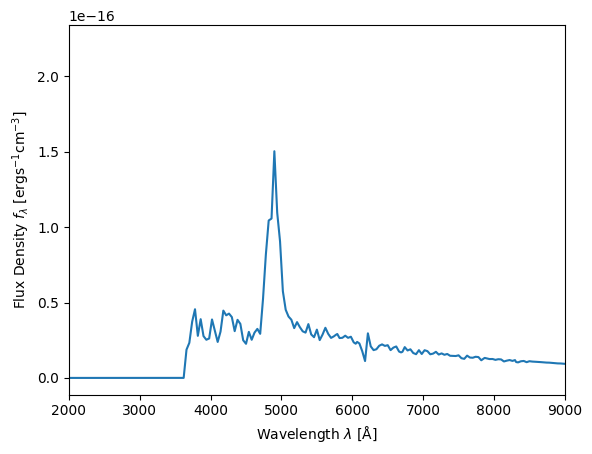

In [69]:
spectrum = simulate_sed(sps_model, sps_params)
plot_sed(spectrum)
import matplotlib.pyplot as plt
#plt.ylim(1e-20, 1e-15)
#plt.xlim(10**2, 10**4)
#plt.yscale("log")